# Principal Component Analysis with Cancer Data

In [453]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [454]:
df = pd.read_csv('Cancer.csv')

In [455]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [456]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [458]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [459]:
df.shape

(699, 11)

In [460]:
df = df.drop(['ID'], axis = 1)

In [461]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [462]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [463]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [464]:
df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [465]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [466]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [467]:
df[df['Bare Nuclei'] == '?']

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [468]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [469]:
df['Bare Nuclei'].replace('?', '1', inplace = True)
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [470]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [471]:
df.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [472]:
# Check Duplicate

In [473]:
dups = df.duplicated()
print("Number of duplicate in dataframe:", dups.sum())

Number of duplicate in dataframe: 242


In [474]:
df.drop_duplicates(subset = None, keep = 'first', inplace = True)
df.shape

(457, 10)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [475]:
# Check for correlation of variable

In [452]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.572961,0.585051,0.376395,0.424863,0.505154,0.490478,0.444999,0.293701,0.671929
Cell Size,0.572961,1.000000,0.876257,0.636158,0.686596,0.584168,0.710696,0.653571,0.401360,0.754380
Cell Shape,0.585051,0.876257,1.000000,0.608572,0.645747,0.610110,0.685179,0.651476,0.379111,0.755177
Marginal Adhesion,0.376395,0.636158,0.608572,1.000000,0.523539,0.586841,0.608256,0.509574,0.355714,0.618088
Single Epithelial Cell Size,0.424863,0.686596,0.645747,0.523539,1.000000,0.477419,0.550626,0.554593,0.432699,0.600130
Bare Nuclei,0.505154,0.584168,0.610110,0.586841,0.477419,1.000000,0.600113,0.466019,0.263617,0.756300
Normal Nucleoli,0.490478,0.710696,0.685179,0.608256,0.550626,0.600113,1.000000,0.604270,0.276981,0.704781
Bland Chromatin,0.444999,0.653571,0.651476,0.509574,0.554593,0.466019,0.604270,1.000000,0.367106,0.636002
Mitoses,0.293701,0.401360,0.379111,0.355714,0.432699,0.263617,0.276981,0.367106,1.000000,0.357504
Class,0.671929,0.754380,0.755177,0.618088,0.600130,0.756300,0.704781,0.636002,0.357504,1.000000


In [382]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [383]:
df.dtypes

ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [384]:
#Let us check for pair plots

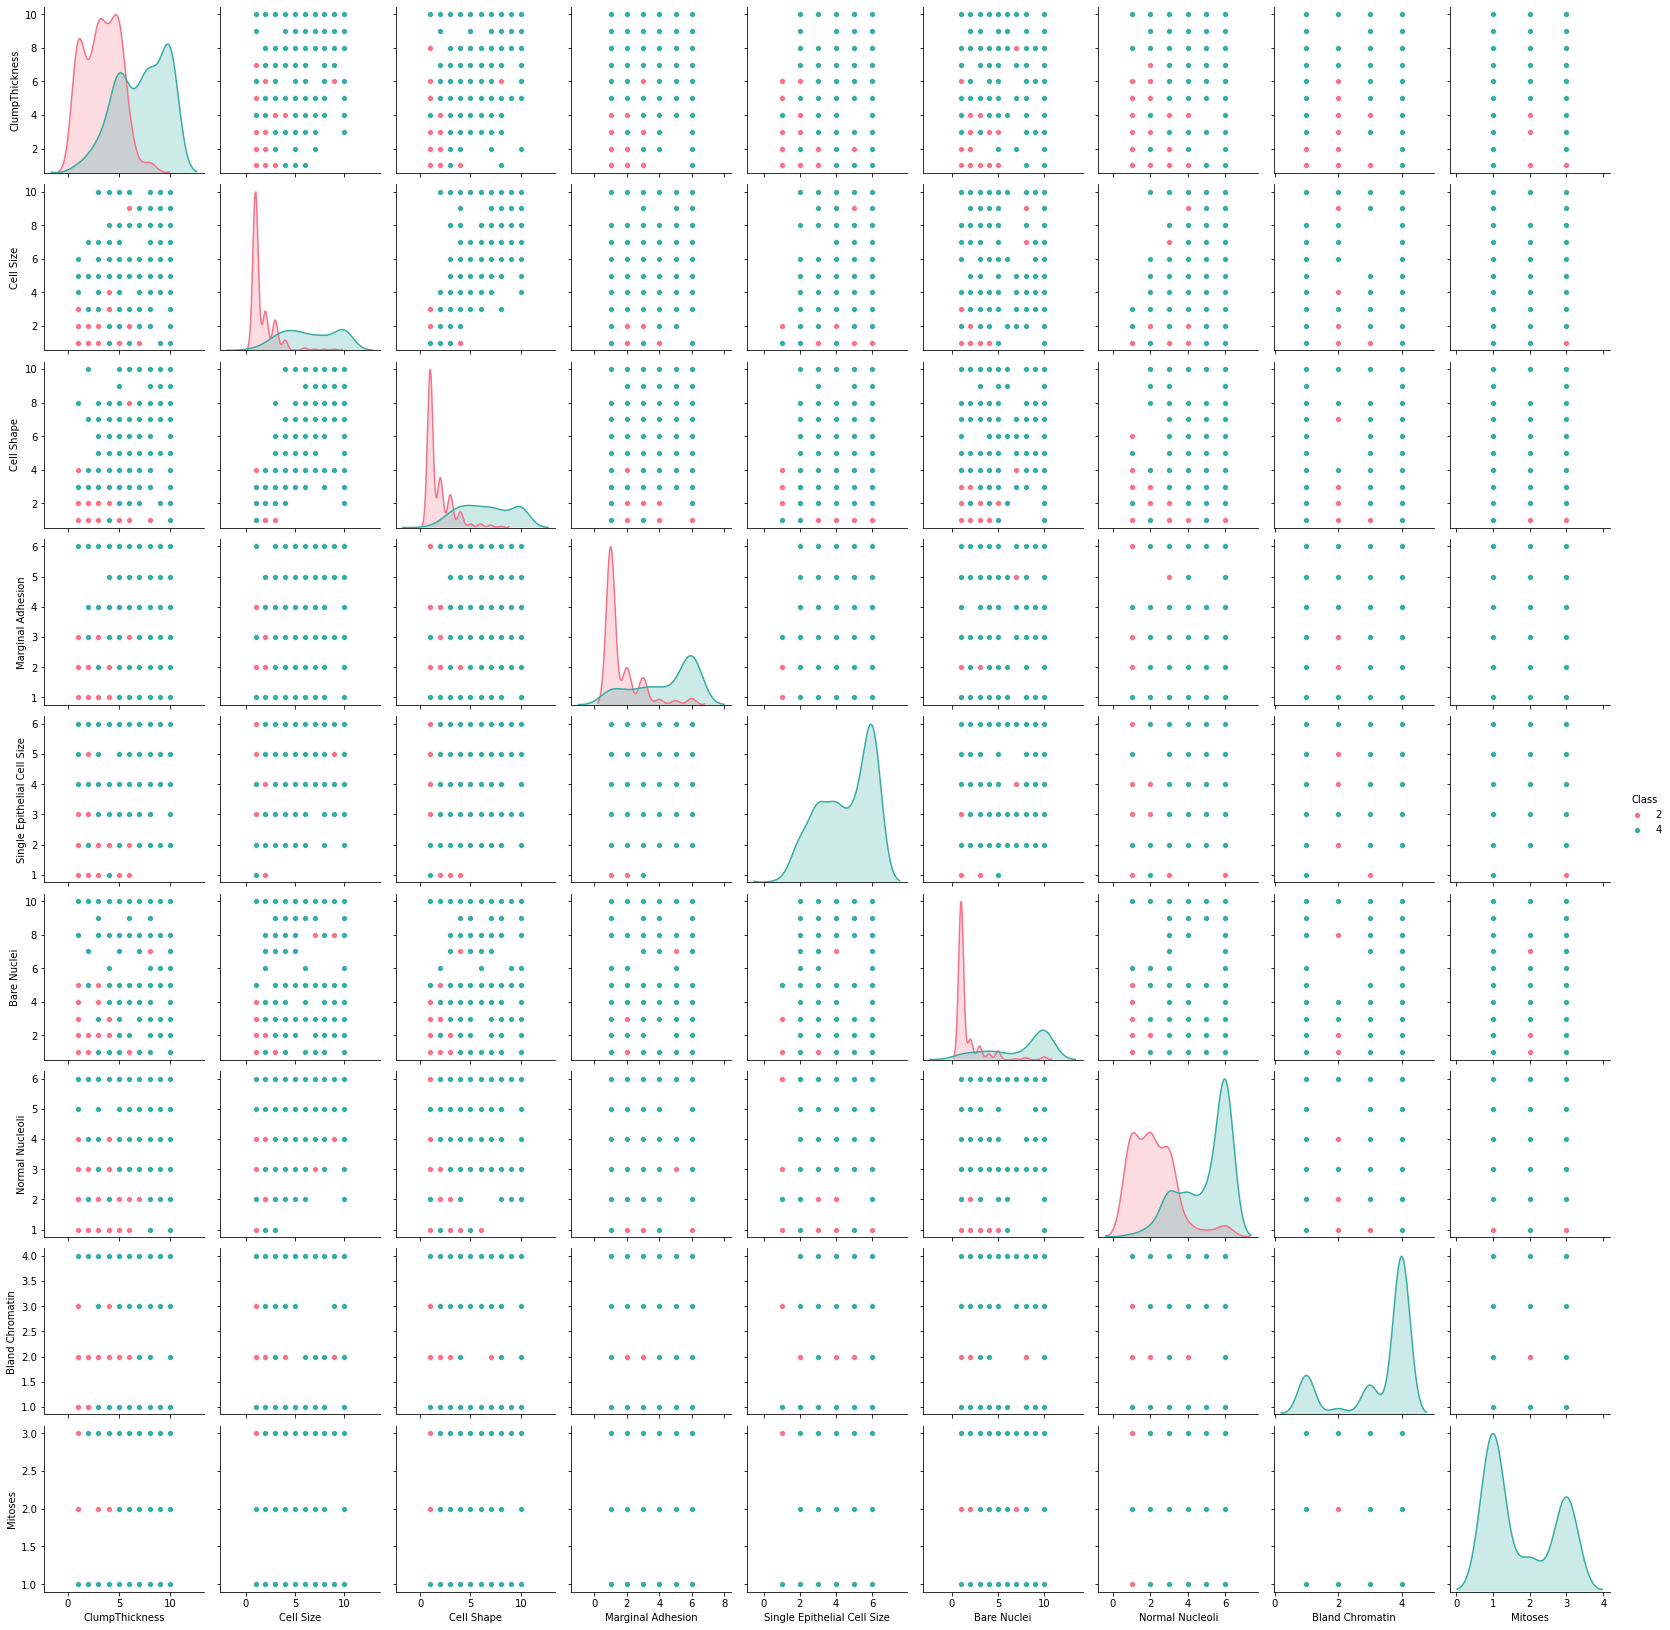

In [417]:
sns.pairplot(df, hue = 'Class', diag_kind = 'kde', palette = 'husl')

In [386]:
print(sns.__version__)

0.10.1


In [387]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [388]:
# We could see most of the outliers are now removed.

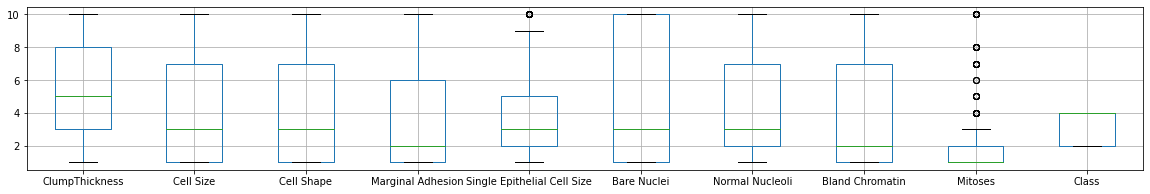

In [389]:
df.boxplot(figsize = (20, 3))

In [390]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,145,31
2,34,19
3,25,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


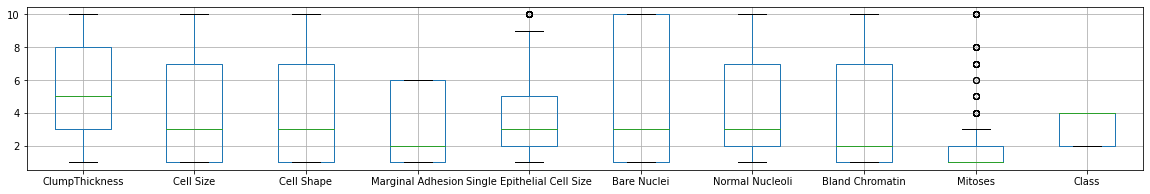

In [391]:
df['Marginal Adhesion'] = np.where((df['Marginal Adhesion']) > 6, 6, df['Marginal Adhesion'])
df.boxplot(figsize = (20, 3))

In [392]:
pd.crosstab(df['Single Epithelial Cell Size'], df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,25,1
2,147,23
3,27,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


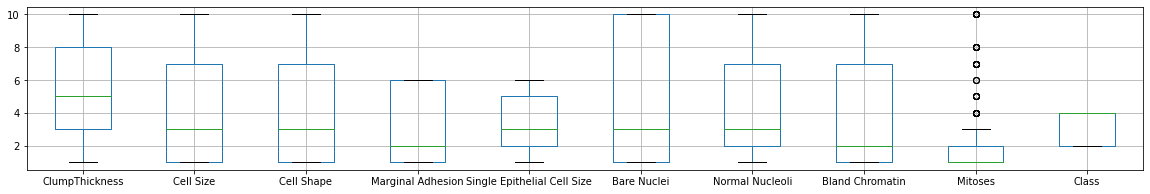

In [393]:
df['Single Epithelial Cell Size'] = np.where((df['Single Epithelial Cell Size']) > 6, 6, df['Single Epithelial Cell Size'])
df.boxplot(figsize = (20, 3))

In [394]:
pd.crosstab(df['Normal Nucleoli'], df['Class'])

Class,2,4
Normal Nucleoli,,
1,71,2
2,68,7
3,60,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


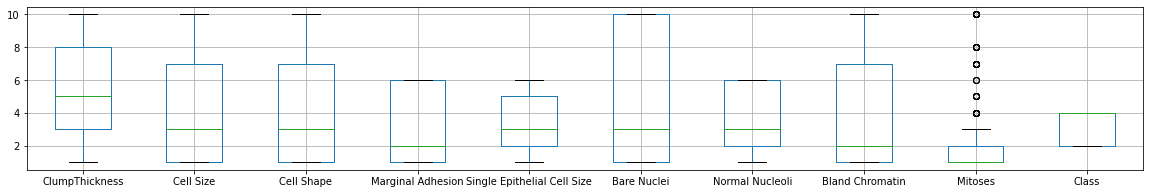

In [395]:
df['Normal Nucleoli'] = np.where(df['Normal Nucleoli'] > 6, 6, df['Normal Nucleoli'])
df.boxplot(figsize=(20,3))

In [396]:
pd.crosstab(df['Bland Chromatin'], df['Class'])

Class,2,4
Bland Chromatin,,
1,166,40
2,27,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


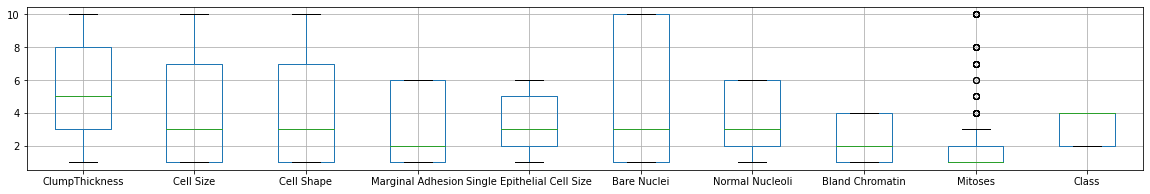

In [397]:
df['Bland Chromatin'] = np.where(df['Bland Chromatin'] > 4, 4, df['Bland Chromatin'])
df.boxplot(figsize=(20,3))

In [398]:
pd.crosstab(df['Mitoses'], df['Class'])

Class,2,4
Mitoses,,
1,206,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [399]:
df['Mitoses'] = np.where((df['Mitoses']) > 3, 3, df['Mitoses'])

In [400]:
pd.crosstab(df['Mitoses'], df['Class'])

Class,2,4
Mitoses,,
1,206,132
2,8,27
3,5,79


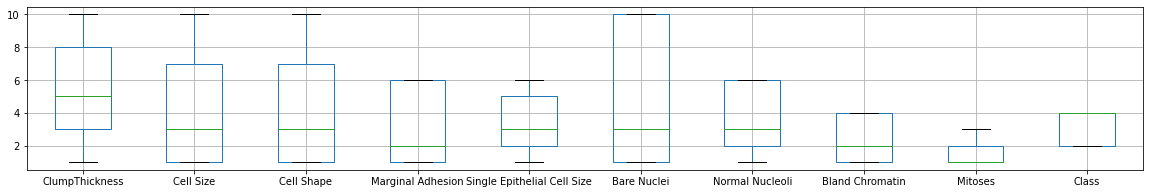

In [401]:
df_new = df.drop(['Class'], axis = 1)
df.boxplot(figsize = (20, 3))

In [402]:
from scipy.stats import zscore
df_new = df_new.apply(zscore)
df_new.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.128603,-0.993808,-1.050717,-1.001800,-0.871008,-0.965209,-0.359385,-1.020192,-0.566655
1,-0.128603,-0.066930,-0.089079,0.929941,1.484322,1.357731,-0.359385,-0.297358,-0.566655
2,-0.828263,-0.993808,-1.050717,-1.001800,-0.871008,-0.707105,-0.359385,-1.020192,-0.566655
3,0.221227,1.168907,1.193104,-1.001800,-0.282176,-0.190896,-0.359385,1.148309,-0.566655
4,-0.478433,-0.993808,-1.050717,-0.035930,-0.871008,-0.965209,-0.359385,-1.020192,-0.566655


# Q6 Create a covariance matrix for identifying Principal components

In [403]:
# PCA
# Step 1 - Create covariance matrix


In [404]:
cov_matrix = np.cov(df_new.T)
cov_matrix

array([[1.00219298, 0.57421719, 0.58633441, 0.41254516, 0.4632509 ,
        0.50626202, 0.52129306, 0.4685217 , 0.35855479],
       [0.57421719, 1.00219298, 0.87817812, 0.65724321, 0.72912055,
        0.58544869, 0.69467472, 0.63582982, 0.43131692],
       [0.58633441, 0.87817812, 1.00219298, 0.62788533, 0.69171911,
        0.61144829, 0.67416566, 0.62536709, 0.39598567],
       [0.41254516, 0.65724321, 0.62788533, 1.00219298, 0.60222797,
        0.61335795, 0.62559502, 0.54812946, 0.36463703],
       [0.4632509 , 0.72912055, 0.69171911, 0.60222797, 1.00219298,
        0.54660466, 0.61060252, 0.61502108, 0.4212404 ],
       [0.50626202, 0.58544869, 0.61144829, 0.61335795, 0.54660466,
        1.00219298, 0.64042239, 0.52613173, 0.36236972],
       [0.52129306, 0.69467472, 0.67416566, 0.62559502, 0.61060252,
        0.64042239, 1.00219298, 0.62814111, 0.33319254],
       [0.4685217 , 0.63582982, 0.62536709, 0.54812946, 0.61502108,
        0.52613173, 0.62814111, 1.00219298, 0.40946416],


In [405]:
cov_matrix_error = np.cov(df_new)
print(cov_matrix_error)

[[ 0.1143487  -0.10681785  0.05178777 ... -0.08247611 -0.08038828
  -0.12986022]
 [-0.10681785  0.61369393 -0.03788164 ... -0.22594983 -0.19523099
  -0.05515062]
 [ 0.05178777 -0.03788164  0.05603664 ... -0.03913891 -0.02603895
  -0.05509629]
 ...
 [-0.08247611 -0.22594983 -0.03913891 ...  0.74294637  0.33916795
   0.37085003]
 [-0.08038828 -0.19523099 -0.02603895 ...  0.33916795  0.54720713
   0.50818175]
 [-0.12986022 -0.05515062 -0.05509629 ...  0.37085003  0.50818175
   0.54739802]]


# Q7 Identify eigen values and eigen vector

In [406]:
# Step 2- Get eigen values and eigen vector

In [407]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors', eig_vecs)
print('Eigem Value', eig_vals)

Eigen Vectors [[-2.93603996e-01  8.00673245e-02 -7.69106806e-03 -8.67576242e-01
   1.36179531e-01  2.70884784e-01  2.49245356e-01  2.20941153e-02
  -1.01686131e-02]
 [-3.80634696e-01 -7.24047874e-02 -7.39014863e-01  1.06609815e-04
  -2.01179677e-01 -2.59108515e-01 -1.44312009e-02 -3.37419036e-01
   2.86463688e-01]
 [-3.75133862e-01 -1.13729163e-01  6.57266625e-01 -7.60423800e-02
  -3.88251319e-01 -2.84002602e-01 -9.09056785e-02 -3.00546899e-01
   2.80302618e-01]
 [-3.33202012e-01 -1.61265198e-01  5.24997805e-02  3.73382983e-01
   7.48581652e-03  2.25349403e-01  6.93997411e-01  3.28839668e-01
   2.83182893e-01]
 [-3.47761833e-01  2.13631618e-03  7.29372267e-02  2.44578141e-01
   4.44452721e-01  5.74590216e-01 -3.88196725e-01 -3.42198423e-01
   1.35758028e-01]
 [-3.27753739e-01 -1.39658748e-01 -9.03590134e-02 -4.15012310e-02
  -3.02132955e-01  1.27066198e-01 -5.23420473e-01  6.94036232e-01
  -1.00196371e-02]
 [-3.51587412e-01 -2.38355677e-01  6.25606590e-02  1.65179247e-02
   6.26611176e

# Q8 Find variance and cumulative variance by each eigen vector

In [408]:
tot = sum(eig_vals)
var_exp = [ (i/tot)*100 for i in sorted(eig_vals, reverse = True)]
var_exp

[61.178455395109644,
 8.469377510023657,
 6.908705783492568,
 6.0371818491983715,
 5.060361600595432,
 3.9116052037232425,
 3.7227384801967696,
 3.4084283872790375,
 1.3031457903813013]

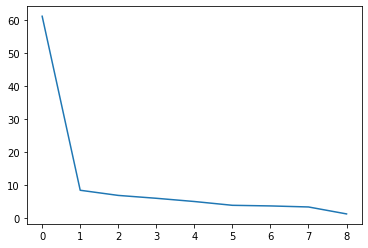

In [409]:
plt.plot(var_exp)

In [410]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 61.1784554   69.64783291  76.55653869  82.59372054  87.65408214
  91.56568734  95.28842582  98.69685421 100.        ]


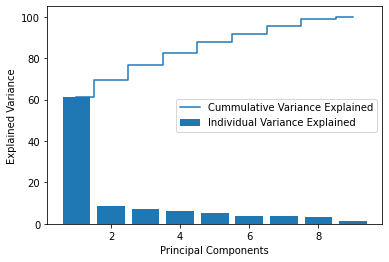

In [411]:
plt.bar(range(1, eig_vals.size +1), var_exp, align = 'center', label = 'Individual Variance Explained')
plt.step(range(1, eig_vals.size +1), cum_var_exp, where = 'mid', label = 'Cummulative Variance Explained')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [412]:
from sklearn.decomposition import PCA

In [413]:
pca = PCA(n_components = 7)
data_red = pca.fit_transform(df_new)
data_red

array([[-2.36119123e+00, -1.73834855e-04,  5.93449673e-01, ...,
        -7.85290641e-02, -8.14858117e-02, -1.80646283e-01],
       [ 8.16537676e-01, -7.84664232e-01, -6.49894562e-01, ...,
         7.10295292e-01,  7.00194772e-01,  1.50091846e+00],
       [-2.48201943e+00, -9.22402811e-02, -2.84691930e-03, ...,
        -7.40006077e-02,  2.27998348e-01, -3.37377124e-01],
       ...,
       [ 2.67290305e+00,  1.25003054e-01, -6.30741094e-01, ...,
         3.81441621e-04,  4.46917653e-01, -8.90847104e-01],
       [ 1.18635329e+00, -1.02143397e+00, -6.14062890e-01, ...,
        -7.19882877e-01, -4.79538372e-01, -1.11436524e+00],
       [ 1.87713154e+00, -1.20701401e+00, -8.78936394e-01, ...,
        -3.26071681e-01, -3.92735171e-01, -8.16474036e-01]])

In [414]:
pca.components_

array([[ 2.93603996e-01,  3.80634696e-01,  3.75133862e-01,
         3.33202012e-01,  3.47761833e-01,  3.27753739e-01,
         3.51587412e-01,  3.32134909e-01,  2.34258007e-01],
       [ 8.00673245e-02, -7.24047874e-02, -1.13729163e-01,
        -1.61265198e-01,  2.13631618e-03, -1.39658748e-01,
        -2.38355677e-01,  3.16752687e-02,  9.33852292e-01],
       [ 8.67576242e-01, -1.06609815e-04,  7.60423800e-02,
        -3.73382983e-01, -2.44578141e-01,  4.15012310e-02,
        -1.65179247e-02, -1.59697048e-01, -1.21644355e-01],
       [-2.20941153e-02,  3.37419036e-01,  3.00546899e-01,
        -3.28839668e-01,  3.42198423e-01, -6.94036232e-01,
        -1.52284620e-01,  2.11754511e-01, -1.42757305e-01],
       [-1.01686131e-02,  2.86463688e-01,  2.80302618e-01,
         2.83182893e-01,  1.35758028e-01, -1.00196371e-02,
        -2.65981192e-01, -8.15896980e-01,  6.40978461e-02],
       [-2.49245356e-01,  1.44312009e-02,  9.09056785e-02,
        -6.93997411e-01,  3.88196725e-01,  5.234204

# Q10 Find correlation between components and features

In [415]:
df_comp_feat = pd.DataFrame(pca.components_, columns = list(df_new))
df_comp_feat

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.293604,0.380635,0.375134,0.333202,0.347762,0.327754,0.351587,0.332135,0.234258
1,0.080067,-0.072405,-0.113729,-0.161265,0.002136,-0.139659,-0.238356,0.031675,0.933852
2,0.867576,-0.000107,0.076042,-0.373383,-0.244578,0.041501,-0.016518,-0.159697,-0.121644
3,-0.022094,0.337419,0.300547,-0.328840,0.342198,-0.694036,-0.152285,0.211755,-0.142757
4,-0.010169,0.286464,0.280303,0.283183,0.135758,-0.010020,-0.265981,-0.815897,0.064098
5,-0.249245,0.014431,0.090906,-0.693997,0.388197,0.523420,0.022138,-0.150376,0.001856
6,0.270885,-0.259109,-0.284003,0.225349,0.574590,0.127066,-0.572990,0.153564,-0.172757


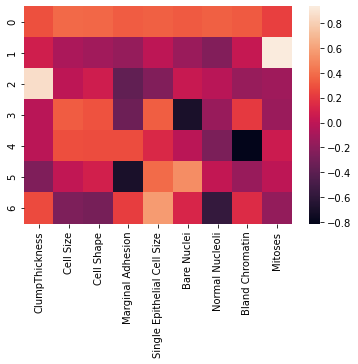

In [416]:
sns.heatmap(df_comp_feat)